In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
scale_image = X_train[0]

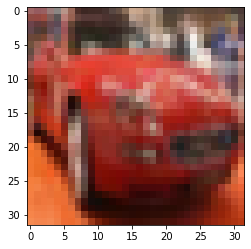

In [6]:
plt.imshow(X_train[5])

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [10]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [11]:
X_train = X_train/255

In [12]:
X_test = X_test/255

In [13]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

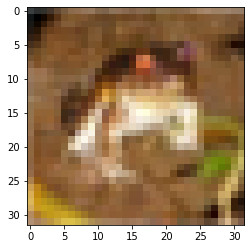

In [14]:
plt.imshow(X_train[0])

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
28*28*1

784

In [18]:
32*32*3

3072

In [19]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 by 32 to 10244 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4947 - accuracy: 0.4581 - val_loss: 1.2966 - val_accuracy: 0.5271
Epoch 2/15
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1589 - accuracy: 0.5895 - val_loss: 1.0760 - val_accuracy: 0.6273
Epoch 3/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0050 - accuracy: 0.6467 - val_loss: 1.0346 - val_accuracy: 0.6370
Epoch 4/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8955 - accuracy: 0.6872 - val_loss: 1.0519 - val_accuracy: 0.6356
Epoch 5/15
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8049 - accuracy: 0.7173 - val_loss: 0.9880 - val_accuracy: 0.6658
Epoch 6/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7305 - accuracy: 0.7458 - val_loss: 0.9665 - val_accuracy: 0.6683
Epoch 7/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6649 - accuracy: 0.7658 - val_loss: 0.9741 -

In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.494717,0.45810,1.296579,0.5271
1,1.158904,0.58946,1.075970,0.6273
2,1.004995,0.64674,1.034617,0.6370
3,0.895541,0.68718,1.051914,0.6356
4,0.804867,0.71734,0.987999,0.6658
5,0.730489,0.74578,0.966533,0.6683
6,0.664881,0.76578,0.974094,0.6778
7,0.600811,0.78968,0.994179,0.6819


<AxesSubplot:>

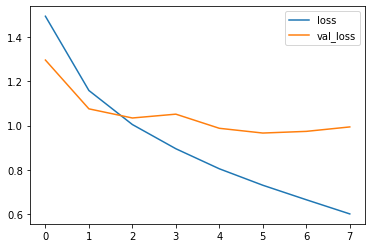

In [26]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

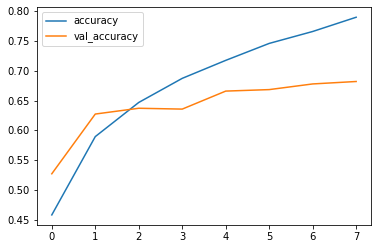

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.994179368019104, 0.6819000244140625]

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
predict = np.argmax(model.predict(X_test), axis=-1)

In [31]:
y_cat_test.shape

(10000, 10)

In [32]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.75      0.81      0.78      1000
           2       0.68      0.46      0.55      1000
           3       0.49      0.55      0.51      1000
           4       0.60      0.68      0.64      1000
           5       0.64      0.52      0.57      1000
           6       0.76      0.77      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.75      0.79      0.77      1000
           9       0.82      0.69      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [34]:
confusion_matrix(y_test,predict)

array([[782,  25,  22,  28,  26,   3,  13,  18,  70,  13],
       [ 32, 811,   1,   8,   8,   5,  15,   9,  43,  68],
       [ 92,  13, 461,  86, 122,  71,  67,  50,  29,   9],
       [ 26,  18,  55, 545,  95, 105,  67,  52,  23,  14],
       [ 28,   6,  50,  74, 676,  22,  36,  82,  22,   4],
       [ 11,  10,  28, 228,  75, 516,  21,  85,  16,  10],
       [  8,  11,  31,  74,  58,  18, 771,  15,  10,   4],
       [ 21,   9,  17,  47,  52,  47,  13, 782,   3,   9],
       [107,  45,   6,  15,   7,   5,   5,   5, 788,  17],
       [ 64, 131,   7,  16,   7,  11,  10,  20,  47, 687]], dtype=int64)

<AxesSubplot:>

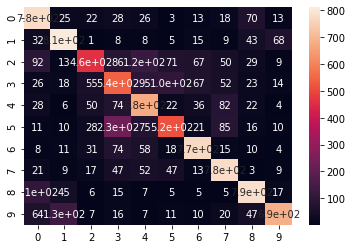

In [35]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [37]:
my_image = X_test[0]

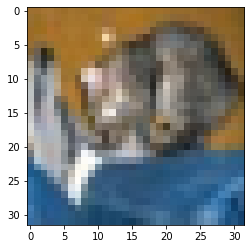

In [39]:
plt.imshow(my_image)

In [38]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([3], dtype=int64)